# centered_eight Inference data

### Loading libraries

In [1]:
import arviz as az

### Loading data "centered_eight"

In [2]:
idata = az.load_arviz_data("centered_eight")
idata

Inference data with groups:
	> posterior
	> sample_stats
	> posterior_predictive
	> prior
	> observed_data

### Displaying centered_eight attributes

In [3]:
idata.posterior

<xarray.Dataset>
Dimensions:  (chain: 4, draw: 500, school: 8)
Coordinates:
  * chain    (chain) int64 0 1 2 3
  * draw     (draw) int64 0 1 2 3 4 5 6 7 8 ... 492 493 494 495 496 497 498 499
  * school   (school) object 'Choate' 'Deerfield' ... "St. Paul's" 'Mt. Hermon'
Data variables:
    mu       (chain, draw) float64 ...
    theta    (chain, draw, school) float64 ...
    tau      (chain, draw) float64 ...
Attributes:
    created_at:                 2019-06-21T17:36:34.398087
    inference_library:          pymc3
    inference_library_version:  3.7

In [4]:
idata.sample_stats

<xarray.Dataset>
Dimensions:           (chain: 4, draw: 500, school: 8)
Coordinates:
  * chain             (chain) int64 0 1 2 3
  * draw              (draw) int64 0 1 2 3 4 5 6 ... 493 494 495 496 497 498 499
  * school            (school) object 'Choate' 'Deerfield' ... 'Mt. Hermon'
Data variables:
    tune              (chain, draw) bool ...
    depth             (chain, draw) int64 ...
    tree_size         (chain, draw) float64 ...
    lp                (chain, draw) float64 ...
    energy_error      (chain, draw) float64 ...
    step_size_bar     (chain, draw) float64 ...
    max_energy_error  (chain, draw) float64 ...
    energy            (chain, draw) float64 ...
    mean_tree_accept  (chain, draw) float64 ...
    step_size         (chain, draw) float64 ...
    diverging         (chain, draw) bool ...
    log_likelihood    (chain, draw, school) float64 ...
Attributes:
    created_at:                 2019-06-21T17:36:34.485802
    inference_library:          pymc3
    inference_library_version:  3.7

In [5]:
idata.posterior_predictive

<xarray.Dataset>
Dimensions:  (chain: 4, draw: 500, school: 8)
Coordinates:
  * chain    (chain) int64 0 1 2 3
  * draw     (draw) int64 0 1 2 3 4 5 6 7 8 ... 492 493 494 495 496 497 498 499
  * school   (school) object 'Choate' 'Deerfield' ... "St. Paul's" 'Mt. Hermon'
Data variables:
    obs      (chain, draw, school) float64 ...
Attributes:
    created_at:                 2019-06-21T17:36:34.489022
    inference_library:          pymc3
    inference_library_version:  3.7

In [6]:
idata.prior

<xarray.Dataset>
Dimensions:    (chain: 1, draw: 500, school: 8)
Coordinates:
  * chain      (chain) int64 0
  * draw       (draw) int64 0 1 2 3 4 5 6 7 ... 492 493 494 495 496 497 498 499
  * school     (school) object 'Choate' 'Deerfield' ... 'Mt. Hermon'
Data variables:
    tau        (chain, draw) float64 ...
    tau_log__  (chain, draw) float64 ...
    mu         (chain, draw) float64 ...
    theta      (chain, draw, school) float64 ...
    obs        (chain, draw, school) float64 ...
Attributes:
    created_at:                 2019-06-21T17:36:34.490387
    inference_library:          pymc3
    inference_library_version:  3.7

In [7]:
idata.observed_data

<xarray.Dataset>
Dimensions:  (school: 8)
Coordinates:
  * school   (school) object 'Choate' 'Deerfield' ... "St. Paul's" 'Mt. Hermon'
Data variables:
    obs      (school) float64 ...
Attributes:
    created_at:                 2019-06-21T17:36:34.491909
    inference_library:          pymc3
    inference_library_version:  3.7

### Plotting centered_eight taces

C:\Users\sudip\Anaconda3\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
C:\Users\sudip\Anaconda3\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
C:\Users\sudip\Anaconda3\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
C:\Users\sudip\Anaconda3\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend

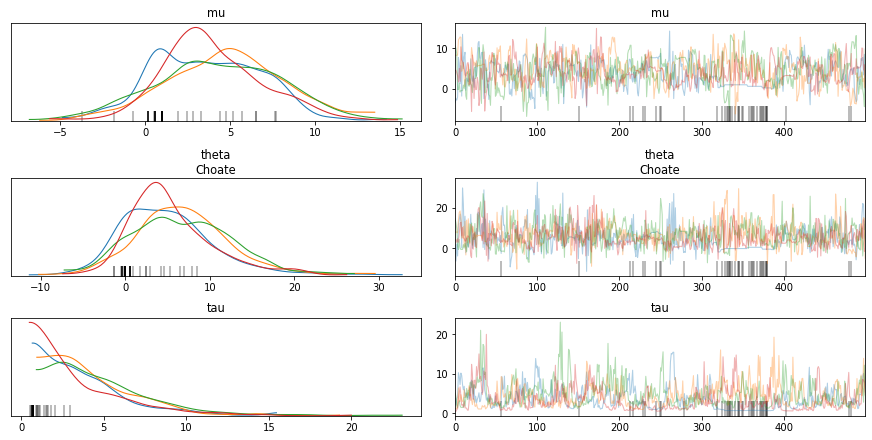

In [8]:
az.plot_trace(idata);